<a href="https://colab.research.google.com/github/wei-jun7/College-recommender-with-big-data/blob/main/CSCI4967_Sp24_FinalPJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSCI 4967: Final Project**

**Spring 2024**

*Group Members: Weijun Li, Yuanzhe Liu, Haochen Song, Yuming Xie, Yi Xu*

# 0.&nbsp;Using GPU for Accelerating Process

In [ ]:
# test if GPU is running
import tensorflow as tf
tf.test.gpu_device_name()
# check which GPU is running
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13621109536728518409
 xla_global_id: -1]

# 1.&nbsp;Import the Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 2.&nbsp;Download, Load, Clean and Slice the dataset

## 2.1&nbsp;Dataset

The dataset is collected, cklustered, and cleaned by *Haochen Song*.

## 2.2&nbsp;Summary of Data

In [ ]:
df = pd.read_csv('/content/cleaned_data900.csv')

In [ ]:
#Check the number of rows and columns
rows, columns = df.shape
print('# of rows: {0} and # of columns: {1}'.format(rows,columns))

# of rows: 920 and # of columns: 30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PREDDEG          920 non-null    int64  
 1   SATVR25          920 non-null    float64
 2   SATVR75          920 non-null    float64
 3   SATMT25          920 non-null    float64
 4   SATMT75          920 non-null    float64
 5   ACTCM25          920 non-null    float64
 6   ACTCM75          920 non-null    float64
 7   MD_EARN_WNE_P10  920 non-null    float64
 8   INSTNM           920 non-null    object 
 9   STUFACR          920 non-null    float64
 10  UGDS_WHITE       920 non-null    float64
 11  UGDS_BLACK       920 non-null    float64
 12  UGDS_HISP        920 non-null    float64
 13  UGDS_ASIAN       920 non-null    float64
 14  UGDS_AIAN        920 non-null    float64
 15  UGDS_ASIAN.1     920 non-null    float64
 16  UGDS_2MOR        920 non-null    float64
 17  UGDS_NRA        

In [ ]:
# check the missing values
print('# missing values across all columns:\n',df.isnull().sum())

# missing values across all columns:
 PREDDEG            0
SATVR25            0
SATVR75            0
SATMT25            0
SATMT75            0
ACTCM25            0
ACTCM75            0
MD_EARN_WNE_P10    0
INSTNM             0
STUFACR            0
UGDS_WHITE         0
UGDS_BLACK         0
UGDS_HISP          0
UGDS_ASIAN         0
UGDS_AIAN          0
UGDS_ASIAN.1       0
UGDS_2MOR          0
UGDS_NRA           0
UGDS_UNKN          0
IRPS_WHITE         0
IRPS_BLACK         0
IRPS_HISP          0
IRPS_ASIAN         0
IRPS_AIAN          0
IRPS_NHPI          0
IRPS_2MOR          0
IRPS_NRA           0
IRPS_UNKN          0
PCTPELL            0
OPEFLAG            0
dtype: int64


In [ ]:
df = df.drop(columns=['INSTNM'])

X = df.drop('MD_EARN_WNE_P10', axis=1)  # Predictor variables
y = df['MD_EARN_WNE_P10']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3.&nbsp;Exploratory Data Analysis

Display summary statistics

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PREDDEG,920.0,2.984783,0.131066,1.0000,3.000000,3.00000,3.000000,3.0000
SATVR25,920.0,531.686957,72.843459,315.0000,480.000000,520.00000,570.000000,740.0000
SATVR75,920.0,632.240217,62.632926,420.0000,590.000000,630.00000,670.000000,790.0000
SATMT25,920.0,524.244565,79.242579,290.0000,470.000000,520.00000,560.000000,770.0000
SATMT75,920.0,627.351087,73.013255,380.0000,580.000000,610.00000,670.000000,800.0000
ACTCM25,920.0,21.423913,4.601494,11.0000,18.000000,20.00000,24.000000,34.0000
ACTCM75,920.0,27.143478,3.979417,15.0000,24.000000,27.00000,30.000000,36.0000
MD_EARN_WNE_P10,920.0,55830.555435,14880.284124,30455.0000,45699.000000,52542.50000,61196.500000,129137.0000
STUFACR,920.0,13.453261,3.925031,5.0000,11.000000,13.00000,16.000000,49.0000
UGDS_WHITE,920.0,0.574266,0.202282,0.0006,0.469675,0.61390,0.728925,0.9347


Generating a correlations heatmap

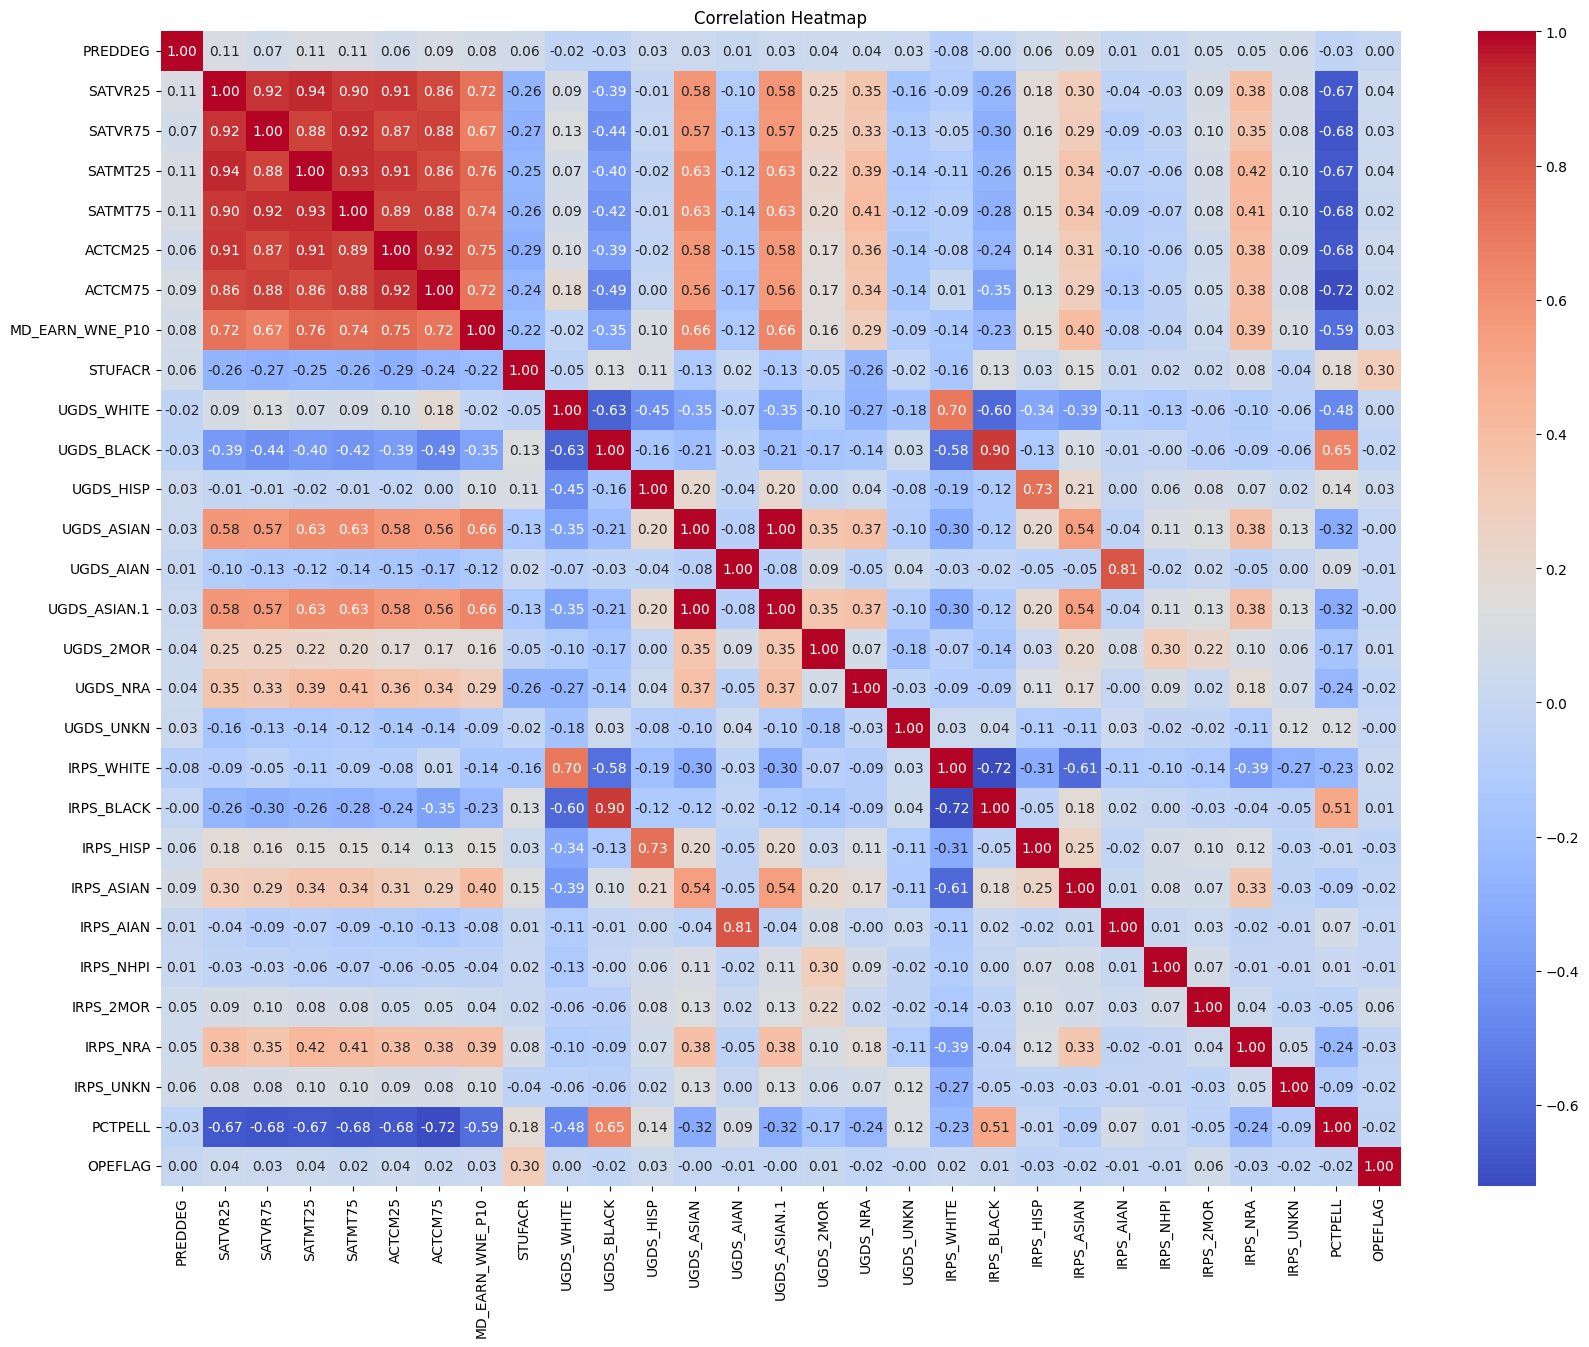

In [ ]:
corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

PCA

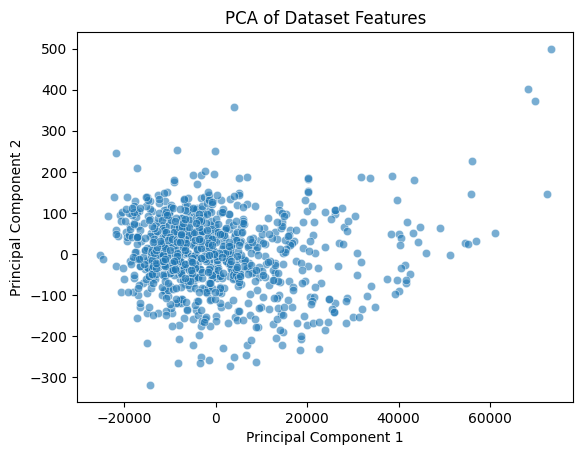

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.6)
plt.title('PCA of Dataset Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Scatter plot for SAT vs. the target variable

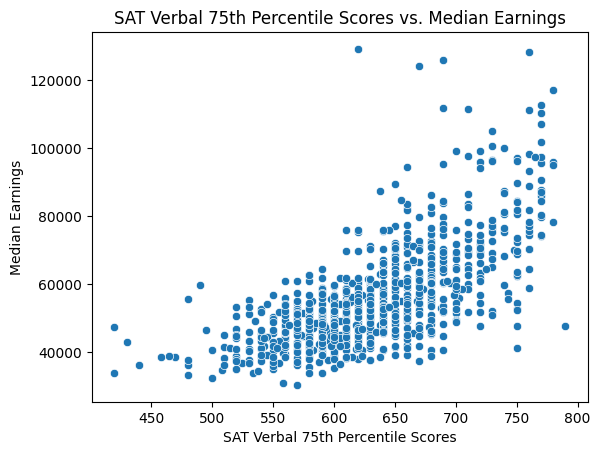

In [ ]:
# Scatter plot for SAT vs. the target variable
sns.scatterplot(x='SATVR75', y='MD_EARN_WNE_P10', data=df)
plt.title('SAT Verbal 75th Percentile Scores vs. Median Earnings')
plt.xlabel('SAT Verbal 75th Percentile Scores')
plt.ylabel('Median Earnings')
plt.show()

Distribution of Target Variable

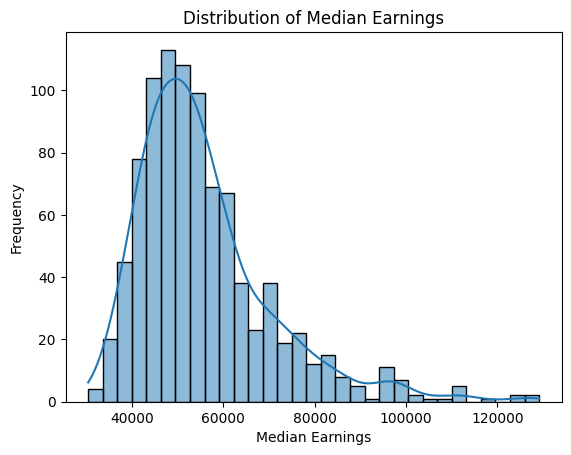

In [ ]:
# Histogram of the Target Variable
sns.histplot(df['MD_EARN_WNE_P10'], kde=True)
plt.title('Distribution of Median Earnings')
plt.xlabel('Median Earnings')
plt.ylabel('Frequency')
plt.show()

Box Plots for Categorical Variables

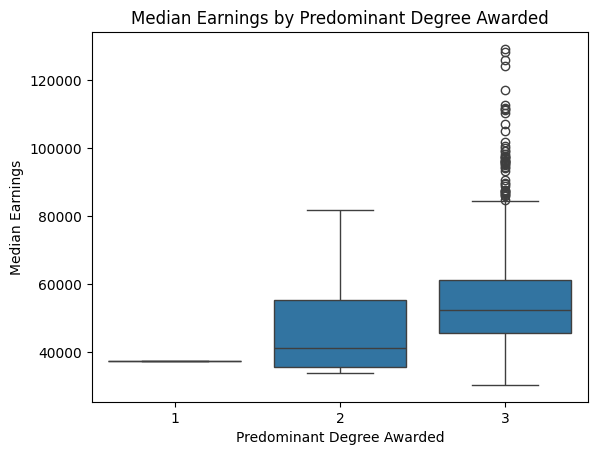

In [ ]:
sns.boxplot(x='PREDDEG', y='MD_EARN_WNE_P10', data=df)
plt.title('Median Earnings by Predominant Degree Awarded')
plt.xlabel('Predominant Degree Awarded')
plt.ylabel('Median Earnings')
plt.show()

Pairwise Relationships of Standard Tests with Median Earning

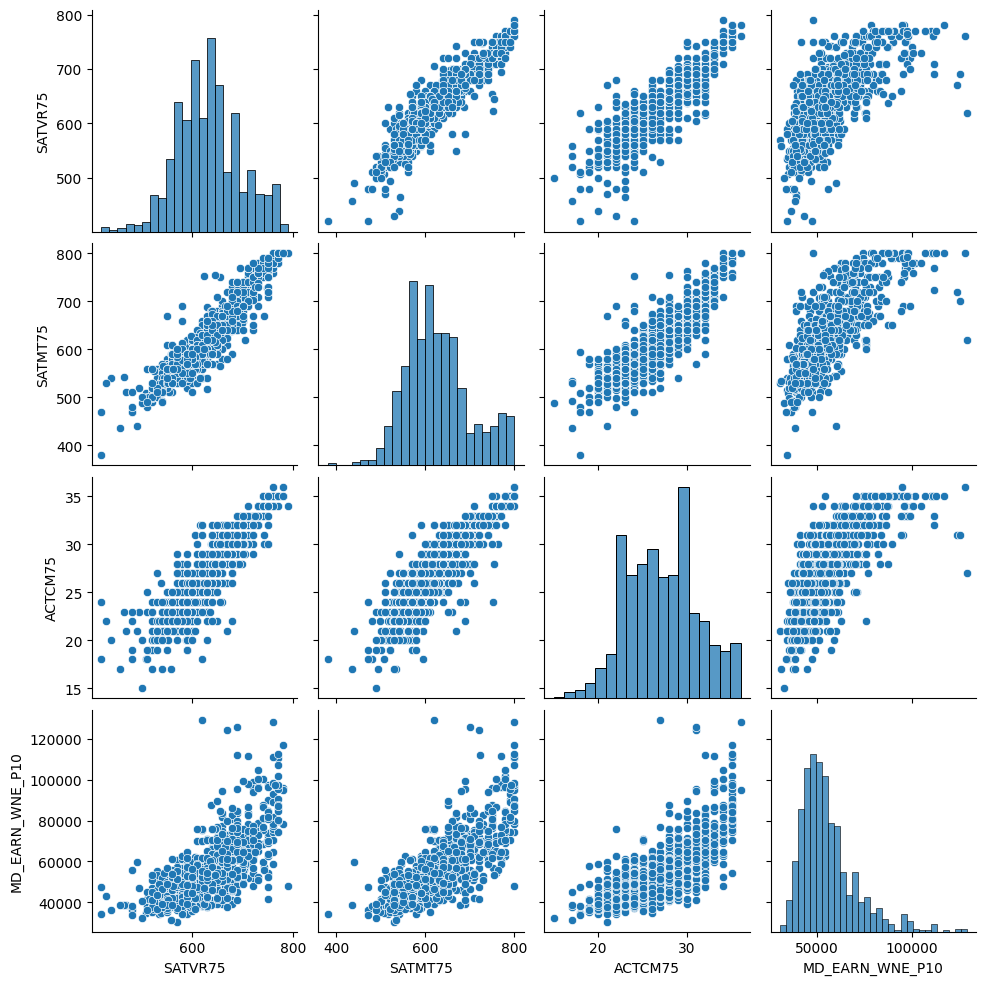

In [ ]:
# Select a subset of features for readability
features = ['SATVR75', 'SATMT75', 'ACTCM75', 'MD_EARN_WNE_P10']
sns.pairplot(df[features])
plt.show()

Outlier Detection

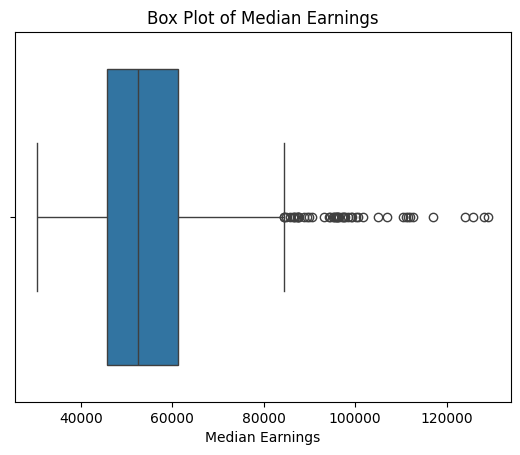

In [ ]:
sns.boxplot(x=df['MD_EARN_WNE_P10'])
plt.title('Box Plot of Median Earnings')
plt.xlabel('Median Earnings')
plt.show()

# 4.&nbsp;The Models

## 4.1&nbsp; Regression Models

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=10000),
}

# Dictionary to store results
results = {}

### 4.1.1&nbsp;Linear Regression

In [ ]:
model1 = models['Linear Regression']
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_linear = model1.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)
results['Linear Regression'] = {'MSE': mse, 'R^2': r2}
print(f"{'Linear Regression'}: \n{'MSE'}: {mse} and {'R^2'}: {r2}")

Linear Regression: 
MSE: 89045876.45013505 and R^2: 0.6695563533865534


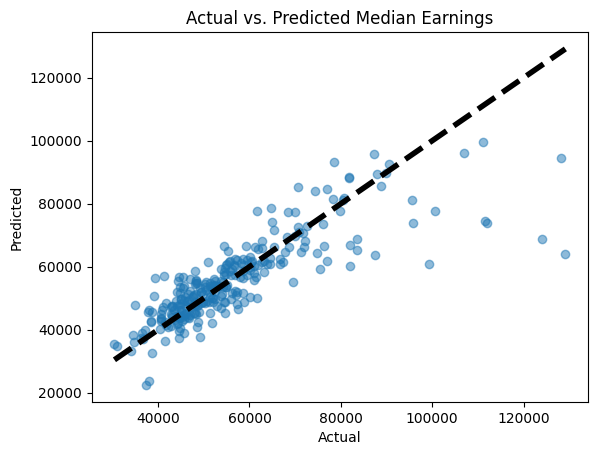

In [ ]:
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Median Earnings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

### 4.1.2&nbsp;Ridge Regression

In [ ]:
model2 = models['Ridge Regression']
model2.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred_ridge = model2.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
results['Ridge Regression'] = {'MSE': mse, 'R^2': r2}
print(f"{'Ridge Regression'}: \n{'MSE'}: {mse} and {'R^2'}: {r2}")

Ridge Regression: 
MSE: 92462837.94916812 and R^2: 0.6568762241869658


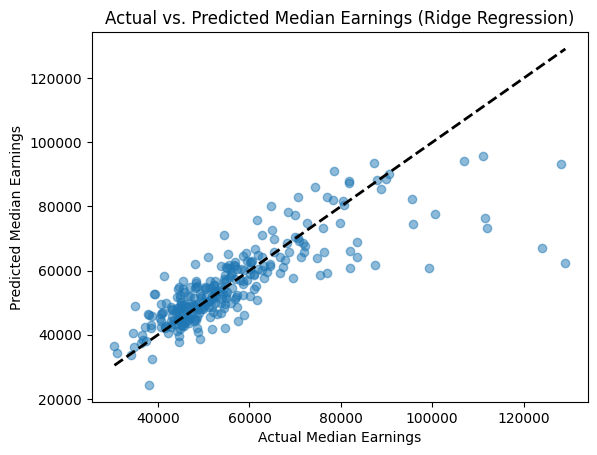

In [ ]:
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel('Actual Median Earnings')
plt.ylabel('Predicted Median Earnings')
plt.title('Actual vs. Predicted Median Earnings (Ridge Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

### 4.1.3&nbsp;Lasso Regression

In [ ]:
model3 = models['Lasso Regression']
model3.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [ ]:
y_pred_lasso = model3.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
results['Lasso Regression'] = {'MSE': mse, 'R^2': r2}
print(f"{'Lasso Regression'}: \n{'MSE'}: {mse} and {'R^2'}: {r2}")

Lasso Regression: 
MSE: 88740076.5532739 and R^2: 0.6706911575693097


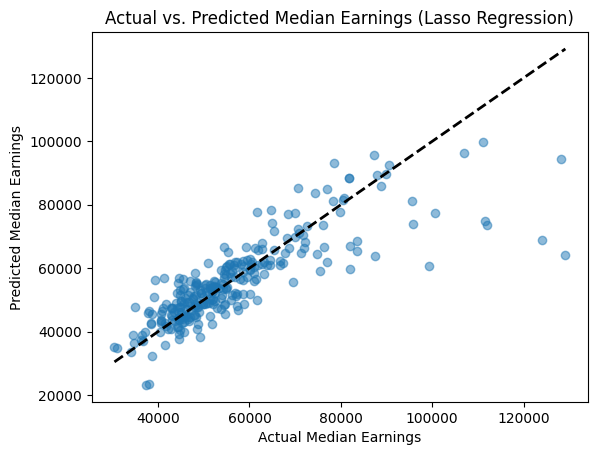

In [ ]:
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.xlabel('Actual Median Earnings')
plt.ylabel('Predicted Median Earnings')
plt.title('Actual vs. Predicted Median Earnings (Lasso Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## 4.2&nbsp; Matrix Factorization Based Models

### 4.2.1&nbsp;Singular Value Decomposition (SVD)

### 4.2.2&nbsp;SVD++

### 4.2.3&nbsp;Non-negative Matrix Factorization(NMF)

## 4.3&nbsp; KNN Inspired Models

### 4.3.1&nbsp;K-Nearest Neighbors Algorithm(KNN)

### 4.3.2&nbsp;KNN with means

### 4.3.3&nbsp;Co-Clustering

## 4.4&nbsp; Deep Learning Models

## 4.5&nbsp; Reinforcement Learning Models

# 5.&nbsp;Evaluation of Performances

# 6.&nbsp;Disscussions & Conclusion

# 7.&nbsp;References